# **ChatGPT User Reviews**

## Overview

ChatGPT is a chatbot and virtual assistant created by OpenAI, released on November 30, 2022. It utilizes large language models, allowing users to guide and shape conversations according to preferred length, format, style, detail, and language.

#### Data Description
This dataset comprises daily updates of user reviews and ratings for the ChatGPT Android App's section on the Google Play Store. It includes several key attributes that detail various aspects of the reviews, offering insights into user experiences and feedback over time.


- `userName`: The display name of the individual who submitted the review.
- `content`: The written text of the review, which includes the user's opinions, feedback, and detailed descriptions of their experience with the ChatGPT app.
- `score`: The rating assigned by the user, generally between 1 and 5. This field reflects the numerical evaluation given by the user, with higher scores indicating more positive experiences and lower scores suggesting dissatisfaction.
- `thumbsUpCount`: The count of thumbs up (likes) that the review has received. This metric indicates how many other users found the review useful or agreed with the sentiments expressed, serving as a gauge of the review’s relevance and influence.
- `at`: The timestamp when the review was posted. This field records the date and time of the review submission, which is essential for tracking the distribution of reviews and analyzing trends over time.



<a id="cont"></a>

## Table of Contents

- [1. Import Packages](#one)
- [2. Load Data](#two)
- [3. Exploratory Data Analysis (EDA)](#three)
- [4. Feature Engineering](#four)
- [5. Modeling](#five)
- [6. Model Explanation](#six)
- [7. Model Evaluation](#seven)
- [8. Model Deployment](#eight)
- [9. Conclusion](#nine)

<a id="one"></a>
# 1. Import Packages
[Back to Table of Contents](#cont)

---

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib

<a id="two"></a>
# 2. Load Data
[Back to Table of Contents](#cont)

---

In [3]:
reviews = pd.read_csv("clean_chatgpt_reviews.csv")

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
[Back to Table of Contents](#cont)

---

In [4]:
reviews.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50


In [5]:
reviews.tail()

,Unnamed: 0,userName,content,score,thumbsUpCount,at
149714,149720,m.santhosh Kumar,Update 2023,5,0,27-07-2023 16:26
149715,149721,Andrew Bourgeois,its grear,5,0,23-09-2023 16:25
149716,149722,Dern Bob,Funtastic App,5,0,08-11-2023 13:57
149717,149723,Abdur rahman arif,hi all,5,0,25-07-2023 15:32
149718,149724,Tushar Deran,expert application,5,0,30-11-2023 18:11


In [6]:
# Display basic information about the training data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149719 entries, 0 to 149718
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     149719 non-null  int64 
 1   userName       149719 non-null  object
 2   content        149719 non-null  object
 3   score          149719 non-null  int64 
 4   thumbsUpCount  149719 non-null  int64 
 5   at             149719 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [7]:
# Display descriptive statistics of the training data
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149719.0,74861.348252,43221.928693,0.0,37430.5,74860.0,112291.5,149724.0
score,149719.0,4.491848,1.096859,1.0,5.0,5.0,5.0,5.0
thumbsUpCount,149719.0,0.492937,12.285116,0.0,0.0,0.0,0.0,1193.0


In [8]:
# Check for missing values in the training data
reviews_missing_values = reviews.isnull().sum()
reviews_missing_values

Unnamed: 0       0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

#### Text Length
A '`text length`' column to display the length of each review ('`content`')

In [9]:
reviews['text length'] = reviews['content'].apply(len)

In [10]:
reviews.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at,text length
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07,26
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56,7
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54,29
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51,46
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50,75


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


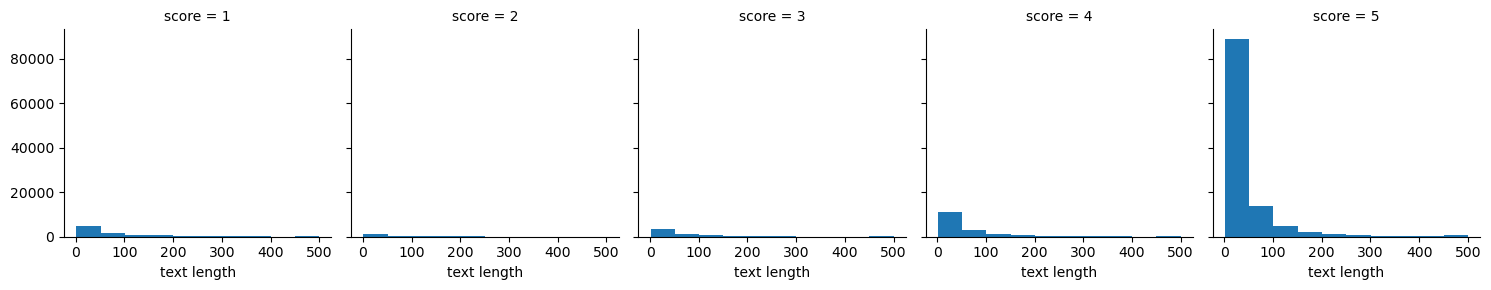

In [11]:
g = sns.FacetGrid(reviews, col='score')
g.map(plt.hist,'text length')

- There are more lengthy reviews with the rating ('`score`') of 5 implying that users who are satsified with using ChatGPT Android App seem to have a lot more to say about their overall experience rather than the users who are dissatsified with the application.

<Axes: xlabel='score', ylabel='text length'>

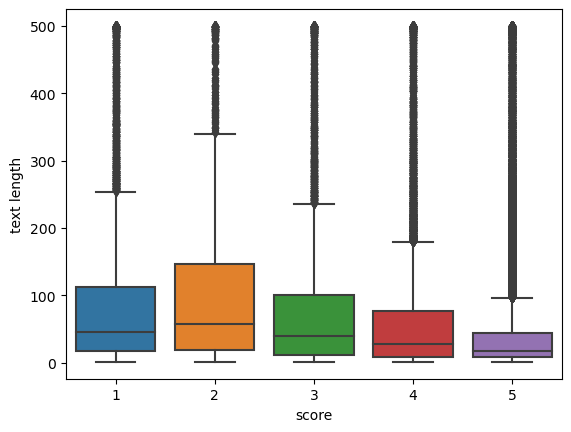

In [12]:
sns.boxplot(x='score', y='text length', data=reviews)

<Axes: xlabel='score', ylabel='count'>

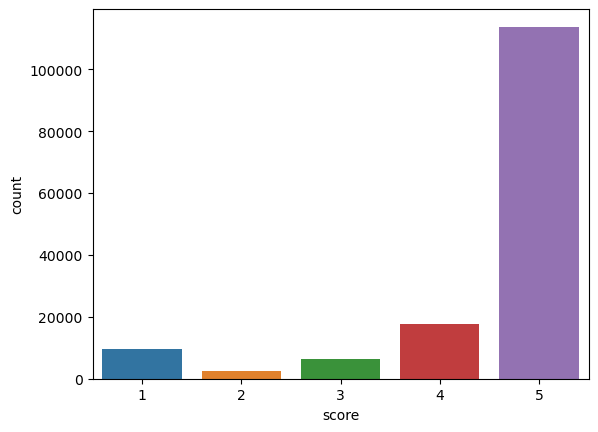

In [13]:
sns.countplot(x='score', data=reviews)

- There is an unequal distribution within the data as most of the reviews are from satsified ChatGPT users who scored a high rating for the application.

In [14]:
# Filter out non-numeric columns
numeric_yelp = reviews.select_dtypes(include=[int, float])

# Group by 'stars' and calculate the mean for each group
score_mean = numeric_yelp.groupby(reviews['score']).mean()

# Display the result
score_mean

,Unnamed: 0,score,thumbsUpCount,text length
score,,,,
1,68123.796128,1.0,0.806907,85.612245
2,62046.556972,2.0,1.758208,103.770568
3,64769.278772,3.0,1.418159,79.564738
4,68629.952676,4.0,0.886355,63.705136
5,77237.378756,5.0,0.326056,41.548163


<Axes: >

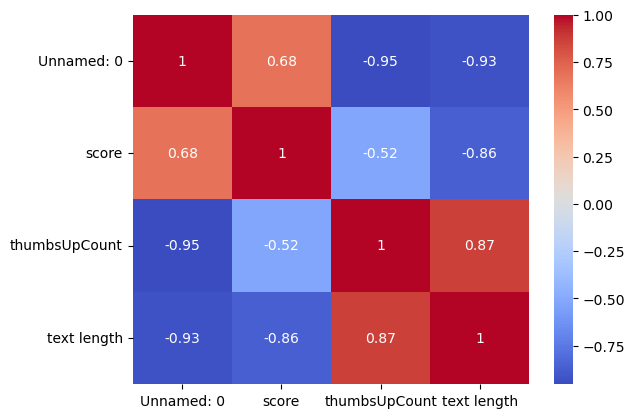

In [15]:
sns.heatmap(score_mean.corr(),cmap='coolwarm', annot=True)

- There seems to be a strong correlation between '`thumbsUpCount`' and '`text length`' which indicates that most users found the reviews with longer text length more useful and users may have resonated more with those sentiments expressed.

<a id="four"></a>
# 4. Feature Engineering
[Back to Table of Contents](#cont)

---

In [16]:
# Convert at column to datetime datatype
reviews['at'] = pd.to_datetime(reviews['at'])

C:\Users\user\AppData\Local\Temp\ipykernel_35024\914216111.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews['at'] = pd.to_datetime(reviews['at'])


In [17]:
reviews_class = reviews[(reviews.score==1)  | (reviews.score==5)]

In [18]:
reviews_class.drop('Unnamed: 0', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_35024\2303927566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_class.drop('Unnamed: 0', axis=1, inplace=True)


<a id="five"></a>
# 5. Modeling
[Back to Table of Contents](#cont)

---

#### Split the dataset into independent (x variable), dependent (target variable) and validation datasets.

In [19]:
X = reviews_class["content"]
y = reviews_class["score"]

- Two objects X and y. X is the 'content' column of reviews_class and y is the 'score' column of reviews_class.

#### Train-Test Split

- Train: used for training the model.
- Test: used for the evaluation of the model performance

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB())   
])

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

<a id="six"></a>
# 6. Model Explanation
[Back to Table of Contents](#cont)

---


### **Why MultinomialNB for ChatGPT User Reviews:**
1. **Classifying Sentiments**: The primary goal is likely to classify the content of the reviews into categories such as positive, negative, or neutral based on the score. MultinomialNB is particularly effective for this type of text classification.
2. **Feature Relevance**: User reviews consist of various words that can be indicative of sentiment (e.g., "great" or "terrible"). MultinomialNB leverages the frequency of these words to determine the sentiment.
3. **Simplicity and Interpretability**: MultinomialNB is simple to implement and interpret. The model’s assumptions are easy to understand, and it often performs well even with the basic preprocessing of text data.
4. **Handling Sparsity**: The frequency vectors for text data are usually sparse (many zeros). MultinomialNB is well-suited for this sparsity, as it relies on the presence and frequency of words rather than complex relationships between them.

<a id="seven"></a>
# 7. Model Evaluation
[Back to Table of Contents](#cont)

---

In [23]:
predictions = pipeline.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.26      0.40      1930
           5       0.94      1.00      0.97     22729

    accuracy                           0.94     24659
   macro avg       0.91      0.63      0.68     24659
weighted avg       0.94      0.94      0.92     24659



- Class 1 (the reviews with the score of '`1`') has a precision of 0.76, recall of 0.59, and an F1-score of 0.66 with 1930 instances.
- Class 5 (the reviews with the score of '`5`') has a precision of 0.97, recall of 0.98, and an F1-score of 0.97 with 22729 instances.
- The model performs very well for class 5, with high precision, recall, and F1-score.
- The model performs less well for class 1, with lower precision, recall, and F1-score which is quite likely for it to perform badly due to the very low number of data submitted for reviews with the score of '`1`'.
- The overall accuracy is high, but the macro average shows that performance varies significantly between the classes, indicating potential issues with class imbalance(as there was more reviews with the score of '`5`' as compared to reviews with the score '`1`'). 

<a id="eight"></a>

# 8. Model Deployment
[Back to Table of Contents](#cont)

---

In [25]:
# Save the model
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

### Make predictions on new data

In [26]:
# Load the trained model
model = joblib.load('model.pkl')

# Example new data for testing
new_reviews = [
    "This app is fantastic! It has exceeded all my expectations.",
    "The app crashes frequently and is very frustrating to use."
]

# Make predictions
predictions = model.predict(new_reviews)

# Display the predictions
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nPredicted Score: {prediction}\n")


Review: This app is fantastic! It has exceeded all my expectations.
Predicted Score: 5

Review: The app crashes frequently and is very frustrating to use.
Predicted Score: 5



<a id='nine'></a>
# 9. Conclusion
[Back to Table of Contents](#cont)

---

So MultinomialNB was a strong candidate for classifying user reviews due to its effectiveness with text data, computational efficiency, and suitability for high-dimensional, sparse feature spaces. It can help in accurately categorizing the sentiment of user reviews, providing valuable insights into user feedback. The overall accuracy of the model is 0.95, meaning the model correctly classifies 95% of the instances. Our model seems to be performing quite well in making predictions on unseen data even though there seems to be a class imbalance. Improvements could be done on our model if there was an equal distribution of the data.